In [2]:
import sys
sys.path.insert(0, '../../')
import picea
from picea import Tree, treeplot
from matplotlib import pyplot as plt
picea.__version__

'0.0.20'

In [2]:
!pwd

/Users/rensholmer/Documents/Code/picea/docs/examples


<AxesSubplot:>

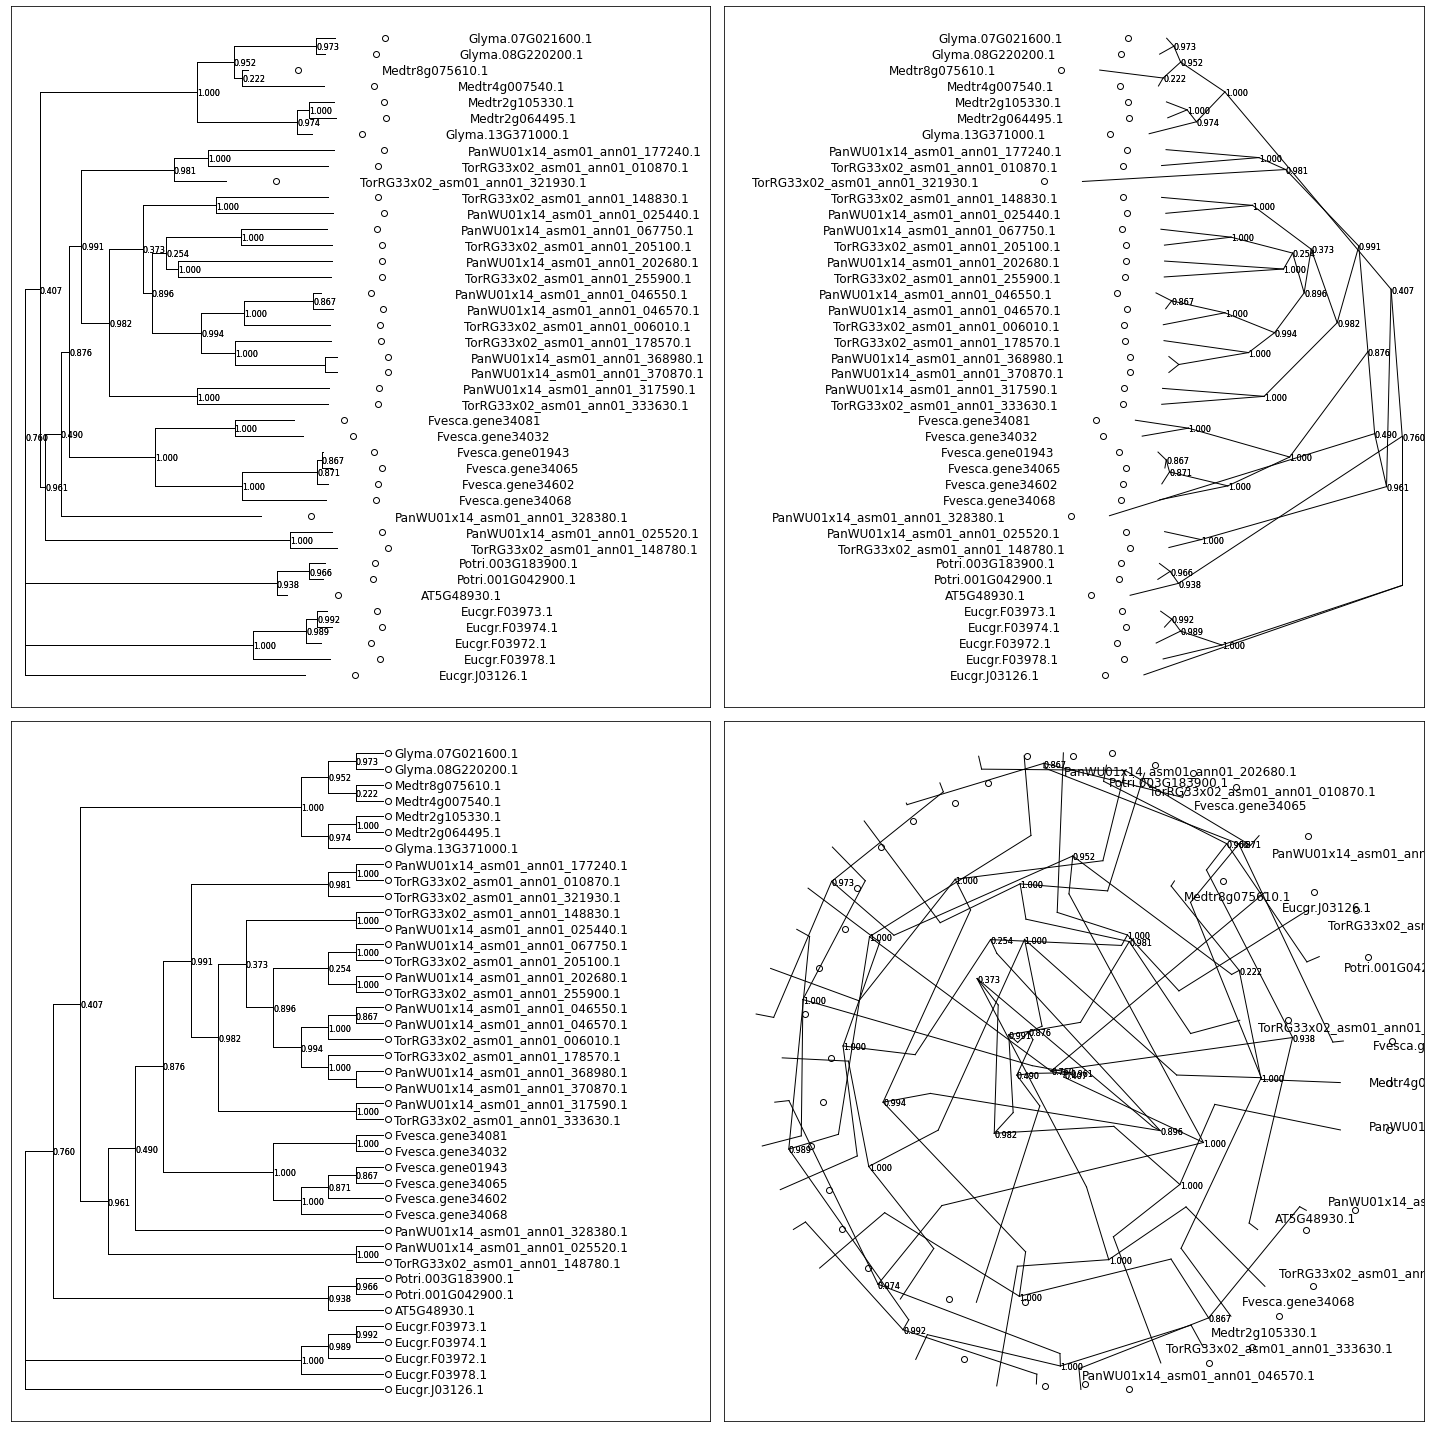

In [3]:
tree = Tree.from_newick(filename='./data/tree.newick')

fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

treeplot(tree, style='square', ax=ax1)
treeplot(tree, style='triangular', ltr=False, ax=ax2)
treeplot(tree, style='square', branchlengths=False, ax=ax3)
treeplot(tree, style='radial', ax=ax4)

In [4]:
0.4 / 25

0.016

In [5]:
x_min,x_max = ax3.get_xlim()
x_max - x_min, .1 * (x_max - x_min), (x_min,x_max)

(25.379500000000004,
 2.5379500000000004,
 (-0.5260000000000001, 24.853500000000004))

In [6]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering.labels_


array([1, 1, 1, 0, 0, 0])

In [7]:
tree = Tree(children=[Tree(),Tree()])
for t in tree.depth_first():
    print(t.ID,t.name)

None None
None None
None None


In [8]:
t.iloc[None]

Tree(name=None, length=0.0, children=[])

In [9]:
tree = Tree.from_sklearn(clustering)
tree.to_newick(branch_lengths=False)

'((2,(0,1)),(4,(3,5)));'

In [10]:
Tree(**tree.to_dict())

Tree(name=None, length=0.0, children=[{'name': None, 'length': 0.0, 'children': [{'name': '2', 'length': 0.0, 'children': []}, {'name': None, 'length': 0.0, 'children': [{'name': '0', 'length': 0.0, 'children': []}, {'name': '1', 'length': 0.0, 'children': []}]}]}, {'name': None, 'length': 0.0, 'children': [{'name': '4', 'length': 0.0, 'children': []}, {'name': None, 'length': 0.0, 'children': [{'name': '3', 'length': 0.0, 'children': []}, {'name': '5', 'length': 0.0, 'children': []}]}]}])

In [11]:
tree.iloc[1].name = 'long name'

In [12]:
print(tree.to_json(indent=2))

{
  "name": null,
  "length": 0.0,
  "children": [
    {
      "name": null,
      "length": 0.0,
      "children": [
        {
          "name": "2",
          "length": 0.0,
          "children": []
        },
        {
          "name": null,
          "length": 0.0,
          "children": [
            {
              "name": "0",
              "length": 0.0,
              "children": []
            },
            {
              "name": "long name",
              "length": 0.0,
              "children": []
            }
          ]
        }
      ]
    },
    {
      "name": null,
      "length": 0.0,
      "children": [
        {
          "name": "4",
          "length": 0.0,
          "children": []
        },
        {
          "name": null,
          "length": 0.0,
          "children": [
            {
              "name": "3",
              "length": 0.0,
              "children": []
            },
            {
              "name": "5",
              "length": 0.0,
     

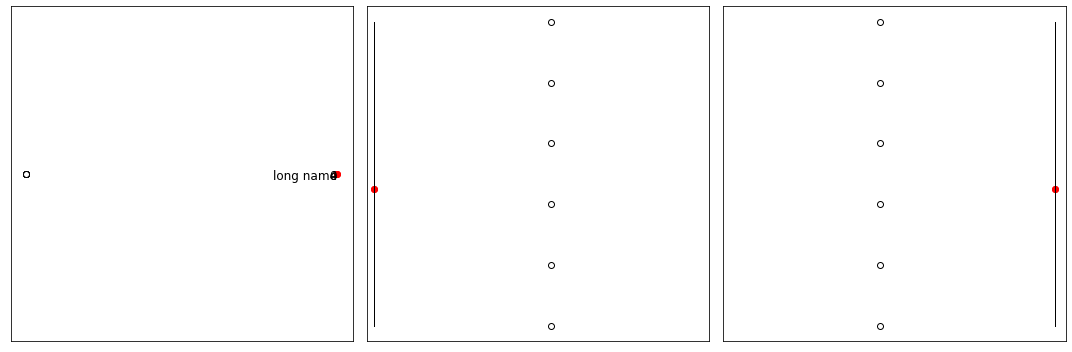

In [13]:
from matplotlib import pyplot as plt
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3,figsize=(15, 5))

picea.treeplot(tree, style='radial', ltr=False, ax=ax1)
picea.treeplot(tree, style='square', ltr=True, ax=ax2)
picea.treeplot(tree, style='triangular', ltr=False, ax=ax3)

for ax in (ax1,ax2,ax3):
    ax.scatter((0,0),(0,0),c='red')


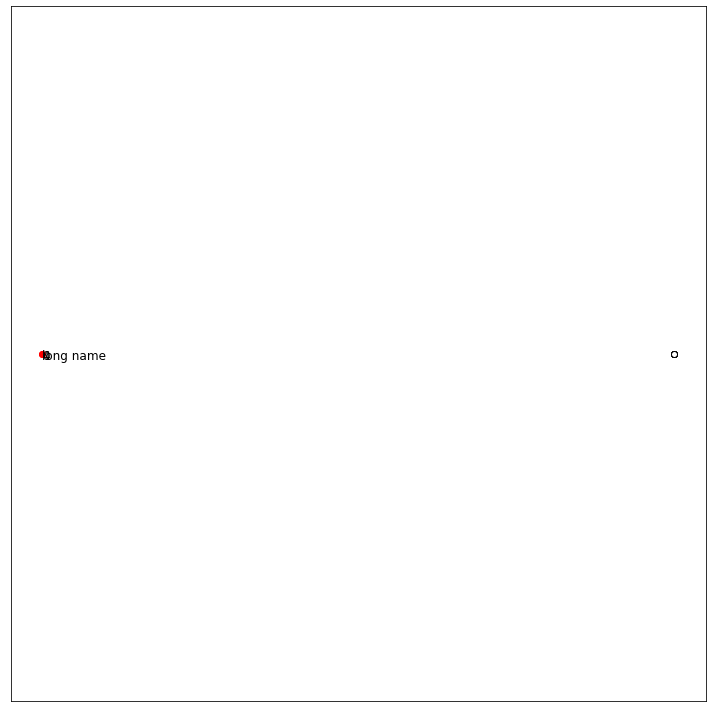

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
picea.treeplot(tree, style='radial', ax=ax)

ax.scatter((0,0),(0,0),c='red')

In [15]:
import numpy as np
from dataclasses import dataclass

@dataclass
class TwoDCoordinate():
    x: float = 0.0
    y: float = 0.0
    
    def __iter__(self):
        yield from (self.x, self.y)
    
    def to_polar(self):
        return TwoDCoordinate(
            x = self.x * np.cos(self.y), 
            y = self.x * np.sin(self.y)
        )
    
    def to_cartesian(self):
        return TwoDCoordinate(
            x = np.sqrt(self.x ** 2 + self.y ** 2),
            y = np.arctan2(self.y, self.x)
        )

c = TwoDCoordinate(x=1, y=1)

c

TwoDCoordinate(x=1, y=1)

In [16]:
c.to_cartesian().to_polar()

TwoDCoordinate(x=1.0000000000000002, y=1.0)

In [17]:
c.to_polar().to_cartesian()

TwoDCoordinate(x=1.0, y=1.0)

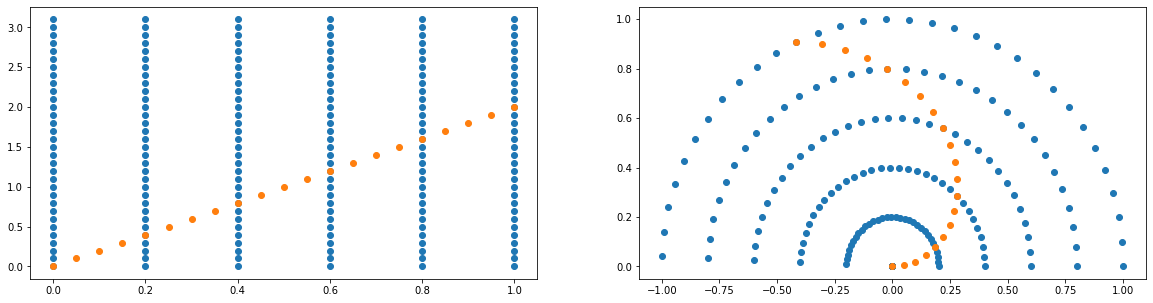

In [18]:
grid = np.array([
    [TwoDCoordinate(x,y) for x in np.arange(0, 1.2, .2)] 
    for y in np.arange(0, np.pi, .1)
]).flatten()

fig,[ax1,ax2] = plt.subplots(ncols=2, figsize=(20,5))


ax1.scatter(*zip(*[[*p] for p in grid]))
ax2.scatter(*zip(*[[*p.to_polar()] for p in grid]))

points = np.array([TwoDCoordinate(x, x*2) for x in np.arange(0., 1.05, .05)])

ax1.scatter(*zip(*[[*p] for p in points]))
ax2.scatter(*zip(*[[*p.to_polar()] for p in points]))

In [125]:
seq = picea.SequenceCollection.from_fasta(filename='./data/HCT.fasta')
_msa = seq.align()
msa = _msa._collection
msa.shape

(41, 577)

In [62]:
import numpy as np
np.sum(v_equals(msa[...,None], msa.T[None,...]),axis=1)

array([[577, 526, 443, ..., 296, 360, 356],
       [526, 577, 441, ..., 298, 366, 361],
       [443, 441, 577, ..., 284, 350, 347],
       ...,
       [296, 298, 284, ..., 577, 303, 304],
       [360, 366, 350, ..., 303, 577, 556],
       [356, 361, 347, ..., 304, 556, 577]])

In [33]:
np.sum(np.equal(msa[...,np.newaxis], msa.T[np.newaxis,...]),axis=1)

array([[577, 526, 443, ..., 296, 360, 356],
       [526, 577, 441, ..., 298, 366, 361],
       [443, 441, 577, ..., 284, 350, 347],
       ...,
       [296, 298, 284, ..., 577, 303, 304],
       [360, 366, 350, ..., 303, 577, 556],
       [356, 361, 347, ..., 304, 556, 577]])

In [35]:
np.equal(msa[...,np.newaxis], msa.T[np.newaxis,...]).shape

(41, 577, 41)

In [38]:
msa[...,np.newaxis].shape, msa.T[np.newaxis,...].shape

((41, 577, 1), (1, 577, 41))

In [148]:
#a = np.random.rand(3,4)
#b = a.T

a = msa
b = msa.T

def equals(x,y):
    return x == y

def lt(x,y):
    return x<y

def subst(x,y):
    #print(x,y)
    return substitution_scores[x][y]

v_equals = np.vectorize(equals)
v_lt = np.vectorize(lt)
v_subst = np.vectorize(subst)

np.sum(v_subst(a[...,None], b[None,...]), axis=1)

array([[2260, 2067, 1758, ...,  948, 1319, 1295],
       [2067, 2298, 1750, ...,  948, 1347, 1320],
       [1758, 1750, 2384, ...,  927, 1297, 1282],
       ...,
       [ 948,  948,  927, ..., 1673,  972,  979],
       [1319, 1347, 1297, ...,  972, 2419, 2313],
       [1295, 1320, 1282, ...,  979, 2313, 2429]])

In [64]:
blosum62_str = """
#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4 
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4 
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4 
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4 
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4 
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4 
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4 
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4 
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3 -3 -1 -4 
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4 -3 -1 -4 
K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0  1 -1 -4 
M -1 -1 -2 -3 -1  0 -2 -3 -2  1  2 -1  5  0 -2 -1 -1 -1 -1  1 -3 -1 -1 -4 
F -2 -3 -3 -3 -2 -3 -3 -3 -1  0  0 -3  0  6 -4 -2 -2  1  3 -1 -3 -3 -1 -4 
P -1 -2 -2 -1 -3 -1 -1 -2 -2 -3 -3 -1 -2 -4  7 -1 -1 -4 -3 -2 -2 -1 -2 -4 
S  1 -1  1  0 -1  0  0  0 -1 -2 -2  0 -1 -2 -1  4  1 -3 -2 -2  0  0  0 -4 
T  0 -1  0 -1 -1 -1 -1 -2 -2 -1 -1 -1 -1 -2 -1  1  5 -2 -2  0 -1 -1  0 -4 
W -3 -3 -4 -4 -2 -2 -3 -2 -2 -3 -2 -3 -1  1 -4 -3 -2 11  2 -3 -4 -3 -2 -4 
Y -2 -2 -2 -3 -2 -1 -2 -3  2 -1 -1 -2 -1  3 -3 -2 -2  2  7 -1 -3 -2 -1 -4 
V  0 -3 -3 -3 -1 -2 -2 -3 -3  3  1 -2  1 -1 -2 -2  0 -3 -1  4 -3 -2 -1 -4 
B -2 -1  3  4 -3  0  1 -1  0 -3 -4  0 -3 -3 -2  0 -1 -4 -3 -3  4  1 -1 -4 
Z -1  0  0  1 -3  3  4 -2  0 -3 -3  1 -1 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
X  0 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2  0  0 -2 -1 -1 -1 -1 -1 -4 
* -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4  1
"""

In [145]:
lines = (line for line in blosum62_str.split('\n') if line)
matrix_lines = (line.strip().split() for line in lines if line[0] != '#')

substitution_scores = defaultdict(lambda: defaultdict(int))
for idx,matrix_line in enumerate(matrix_lines):
    if idx == 0:
        aas = matrix_line
        encoded_aas = np.array([*''.join(aas).encode()], dtype=np.uint8)
        aa_encoding = dict(zip(aas, encoded_aas))
        continue
    [aa,*scores] = matrix_line
    substitution_scores[aa_encoding[aa]].update(dict(zip(encoded_aas, scores)))
substitution_scores.keys()
    

dict_keys([65, 82, 78, 68, 67, 81, 69, 71, 72, 73, 76, 75, 77, 70, 80, 83, 84, 87, 89, 86, 66, 90, 88, 42])

In [144]:
d = defaultdict(lambda: defaultdict(int))
d[0].update(dict(a=1))
d

defaultdict(<function __main__.<lambda>()>, {0: defaultdict(int, {'a': 1})})

In [127]:
aa_encoding

{'A': 65,
 'R': 82,
 'N': 78,
 'D': 68,
 'C': 67,
 'Q': 81,
 'E': 69,
 'G': 71,
 'H': 72,
 'I': 73,
 'L': 76,
 'K': 75,
 'M': 77,
 'F': 70,
 'P': 80,
 'S': 83,
 'T': 84,
 'W': 87,
 'Y': 89,
 'V': 86,
 'B': 66,
 'Z': 90,
 'X': 88,
 '*': 42}

In [134]:
np.array([45],dtype=np.uint8).view('S1')[0].decode()

'-'